<a href="https://colab.research.google.com/github/JazmineOrtizMarin/Simulaci-n-2/blob/main/Monster_Hunter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def log_densidad_objetivo(x):
    x1, x2 = x[0], x[1]
    exponente = -(x1**2 * x2**2 + x1**2 + x2**2 - 8*x1 - 8*x2) / 2
    return exponente

In [19]:
numero_muestras = 50000        # Número total de muestras a generar
estado_inicial = np.array([1.0, 1.0]) # Punto de partida de la cadena
desviacion_propuesta = 0.8     # Desviación estándar de la propuesta
periodo_quemado = 5000         # Muestras iniciales a descartar

In [20]:
muestras = np.zeros((numero_muestras, 2))
estado_actual = estado_inicial
muestras[0] = estado_actual

In [21]:
log_prob_actual = log_densidad_objetivo(estado_actual)

In [22]:
for i in range(1, numero_muestras):

    propuesta = estado_actual + np.random.normal(0, desviacion_propuesta, size=2)

    log_prob_propuesta = log_densidad_objetivo(propuesta)

    log_ratio_aceptacion = log_prob_propuesta - log_prob_actual

    if np.log(np.random.rand()) < log_ratio_aceptacion:
        estado_actual = propuesta
        log_prob_actual = log_prob_propuesta

    muestras[i] = estado_actual

In [23]:
muestras_finales = muestras[periodo_quemado:]

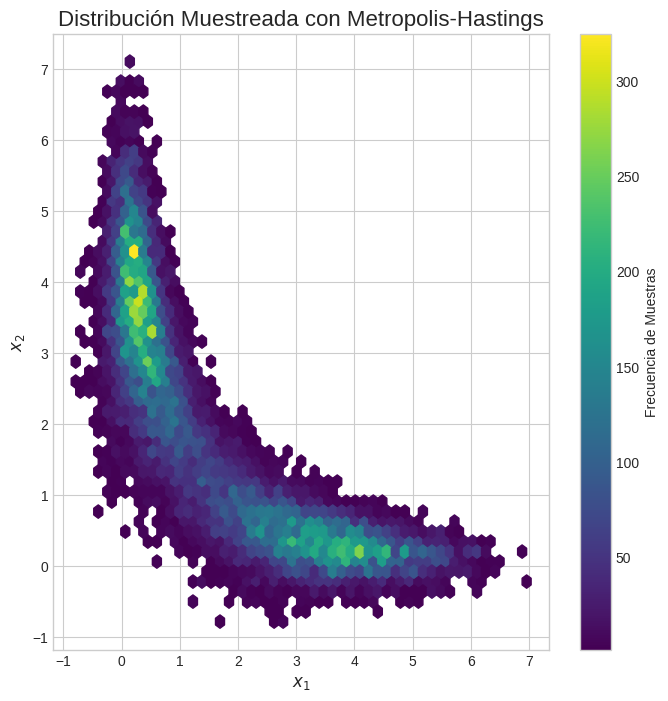

In [24]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 8))

hb = ax.hexbin(
    muestras_finales[:, 0],
    muestras_finales[:, 1],
    gridsize=50,
    cmap='viridis',
    mincnt=1
)

cb = fig.colorbar(hb, ax=ax)
cb.set_label('Frecuencia de Muestras')

# Títulos y etiquetas
ax.set_title('Distribución Muestreada con Metropolis-Hastings', fontsize=16)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)

plt.show()
